# Define GGL algorithm

In [56]:
def GGL(x_i):
    return 16807*x_i % (m_ggL)

# Define RAN3 algorithm

In [57]:
def RAN3(x_i_55, xi_24):
    return (x_i_55 - x_i_24) % m_ran3

## Definitions
Define modulos, m_ggl and m_ran3
Define arrays for X~U(0,1) and X~U(0,1)
Define initial seed for GGL, x_i
Define the number of iterations

In [58]:
m_ggL = 2**31-1
m_ran3 = 2**32
ggl_X = []
ggl_Y = []
x_i = 112
iterations = 1000000

## GGL generation

In [59]:
for i in range(iterations):
    x_i = GGL(x_i)
    x_i_normalized = x_i / (m_ggL)
    if i % 2 == 0:
        ggl_X.append(x_i_normalized)
    else:
        ggl_Y.append(x_i_normalized)



## RAN3 generation

In [60]:
seed_array = X[:55]
for i in range(iterations):
    x_i_55 = seed_array[-55] 
    x_i_24 = seed_array[-24]
    x_i = RAN3(x_i_55, x_i_24)
    seed_array.append(x_i)
    
ran3_results = seed_array[55:]

ran3_normalized = [val / m_ran3 for val in ran3_results]

ran3_X = ran3_normalized[0::2]
ran3_Y = ran3_normalized[1::2]


## Built-in generation

In [61]:
import random 

mersenne_X = []
mersenne_Y = []

for i in range(iterations):
    rand = random.uniform(0, 1)
    if i % 2 == 0:
        mersenne_X.append(rand)
    else:
        mersenne_Y.append(rand)

# Plot samples

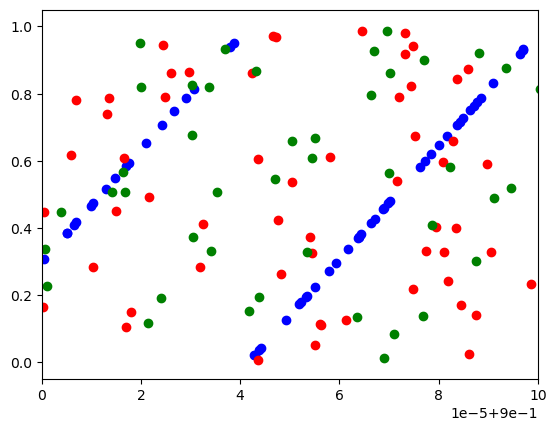

In [66]:
import matplotlib.pyplot as plt

e = 0.0001
min = 0.9

plt.scatter(ggl_X, ggl_Y, c='b')
plt.scatter(ran3_X, ran3_Y, c='r')
plt.scatter(mersenne_X, mersenne_Y, c='g')
plt.xlim(min, min+e)
plt.show()



## FINDINGS
1) GGL generated random numbers (blue) appear to be highly correlated as was warned in the lecture slides
2) RAN3 (red) and Mersenne-Twister (green) do not appear to suffer from correlations